## Install Prophet



## Import de librairies 



In [ ]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 412 kB/s 


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.3 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751985 sha256=bbf5a6402c9485eb31c1f471bf5e2bcafe4d2a41a9947206cdc546f40331d271
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
# Data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get time series data
import yfinance as yf

# Prophet model for time series forecast
import fbprophet
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

# Visualization
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

In [ ]:
# import the data
data = pd.read_csv("BTC-USD Historical Data.csv")
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,2018,1
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,2018,1
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,2018,1
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,2018,1
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,2018,1


In [ ]:
data['year'].value_counts()

2020    366
2018    365
2019    365
2021    365
2022    330
Name: year, dtype: int64

In [ ]:
#statistiques descriptives
data.describe()

,Open,High,Low,Close,Adj Close,Volume,year,month
count,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1.791000e+03,1791.000000,1791.000000
mean,20406.830725,20913.199808,19831.657996,20405.817595,20405.817595,2.676180e+10,2019.960916,6.418760
std,17149.373725,17596.551171,16630.387960,17144.347614,17144.347614,1.997137e+10,1.399773,3.399468
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09,2018.000000,1.000000
25%,7629.030029,7770.270019,7465.039551,7623.104981,7623.104981,1.229034e+10,2019.000000,3.000000
50%,10796.930664,11048.662109,10503.504883,10793.339844,10793.339844,2.445711e+10,2020.000000,6.000000
75%,34280.585938,35324.634765,32827.230469,34254.855469,34254.855469,3.610481e+10,2021.000000,9.000000
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,2022.000000,12.000000


As seen above, from January 2016 to July 2021, the minimum price of Bitcoin is $68 while the maximum prices $63,503.45. We need to remember that this was the close price and the highest price of Bitcoin was actually over $65,000.
The mean value our Bitcoin was around $6711 and the median was around $2286.




# Visualisation

## Plot Line Chart

In [ ]:
# Plot the close price of the BTC
fig = px.line(x = data['Date'], y = data['Close'])
fig.show()

The price was low early 2017 and suddenly, there was an explosion in terms of its price. In one year, he goes from 1000 $ to 19,000 $

In [ ]:
data.reset_index(inplace=True,drop=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,2018,1
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,2018,1
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,2018,1
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,2018,1
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,2018,1


## Plot Area Chart

In [ ]:
# Plot the close price of the BTC
fig = px.area(x = data['Date'], y = data['Close'])
fig.show()

## Calculate ROC 

 Visualisation by adding an indicator subplot called ROC ( Rate of Change) to a price series to see the growth per number of days ago called lag

In [ ]:
%matplotlib inline

lag = 7 #number of days
data['ROC'] = ( data['Adj Close'] / data['Adj Close'].shift(lag) -1 ) * 100
data[['Adj Close', 'ROC']]

data_sel = data[-100:]
dates = data_sel.index
price = data_sel['Adj Close']
roc = data_sel['ROC']

#Date as index for graph chart
data_sel['Date']=pd.to_datetime(data_sel['Date'])
data_sel.set_index(data_sel['Date'],inplace = True)


<ipython-input-10-e7b6d4193dcf>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, '7-Day ROC')

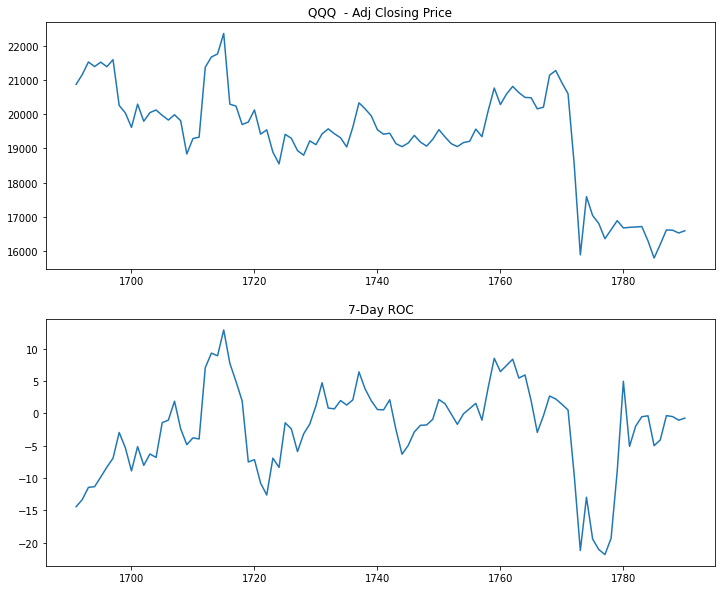

In [ ]:
fig = plt.figure(figsize=(12,10))
# The price subplot:
price_ax = plt.subplot(2,1,1)
price_ax.plot(dates, price)
# The ROC subplot shares the date axis with the price plot:
roc_ax = plt.subplot(2,1,2, sharex=price_ax)
roc_ax.plot(roc)
# We can add titles to each of the subplots:
price_ax.set_title("QQQ  - Adj Closing Price")
roc_ax.set_title("7-Day ROC")

Text(0, 0.5, '% ROC')

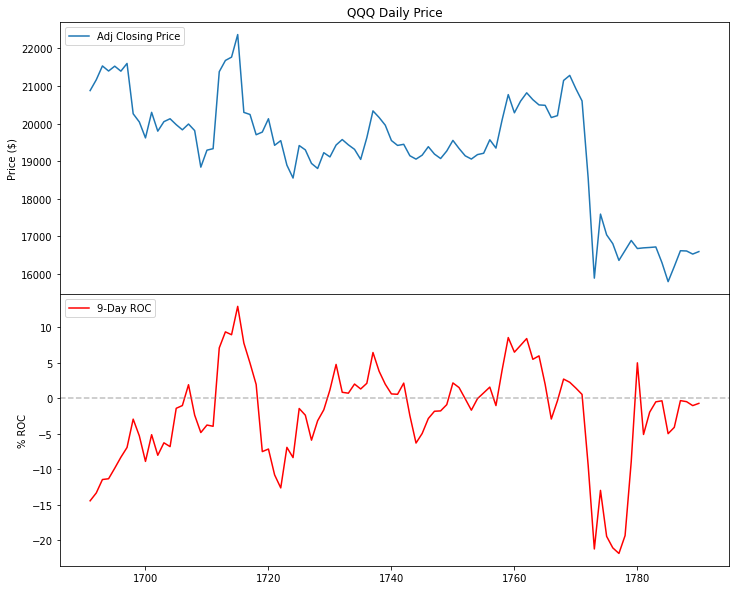

In [ ]:
#add a horizontal line at the zero level of the ROC to make it more readable, as well as to add labels to both vertical axes.

fig = plt.figure(figsize=(12,10))
price_ax = plt.subplot(2,1,1)
price_ax.plot(dates, price, label="Adj Closing Price")
price_ax.legend(loc="upper left")
roc_ax = plt.subplot(2,1,2, sharex=price_ax)
roc_ax.plot(roc, label="9-Day ROC", color="red")
roc_ax.legend(loc="upper left")
price_ax.set_title("QQQ Daily Price")
# Removing the date labels and ticks from the price subplot:
price_ax.get_xaxis().set_visible(False)
# Removing the gap between the plots:
fig.subplots_adjust(hspace=0)
# Adding a horizontal line at the zero level in the ROC subplot:
roc_ax.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
# We can add labels to both vertical axis:
price_ax.set_ylabel("Price ($)")
roc_ax.set_ylabel("% ROC")

## Plot Candle Chart

In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 3.2 MB/s 


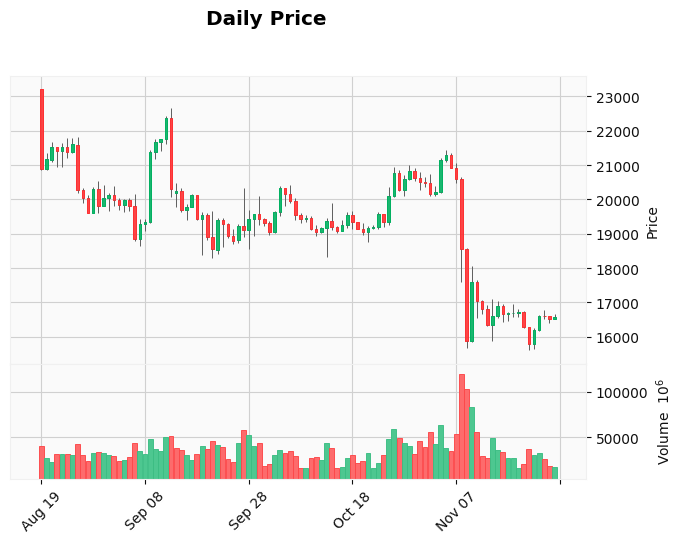

In [ ]:
import mplfinance as mpf
mpf.plot(data_sel, type='candle',  style='yahoo', title="Daily Price", volume=True)

---

## Indicators

## Calculating Simple Moving Average

In [ ]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

closing_prices = data['Close'] # Use only closing prices
sma = get_sma(closing_prices, 20) # Get 20 day SMA

## Exponential moving average

In [ ]:
def get_ema(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema

ema = calculate_ema(data['Close'], 10)

NameError: ignored

## Calculating Bollinger Bands

In [ ]:
def get_bollinger_bands(prices, rate=20):
    sma = get_sma(prices, rate) # Get SMA for 20 days
    std = prices.rolling(rate).std() # Get rolling standard deviation for 20 days
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

data.index = np.arange(data.shape[0])

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

## Calculating RSI

In [ ]:
# Loop through an enumerated set of our data
# to keep track of which period we are currently
# making calculations for.
for i, price in enumerate(data):
    # keep track of the price for the first period
    # but don't calculate a difference value.
    if i == 0:
        window.append(price)
        output.append([i+1, price, 0, 0, 0, 0, 0])
        continue
    # After the first period, calculate the difference
    # between price and previous price as a rounded value
    difference = round(data[i] - data[i - 1], 2)

---

# Forecasting with prophet facebook 🧙‍♂️🧙‍♂️

Formatting Date time into YYYY-MM-DD and name ds 
Target value is the open price per day and name y


In [ ]:
import pandas as pd 

# Formater la date : 

data['Date'] = pd.to_datetime(data['Date'],origin='unix').dt.date


# générer le tableau pour le forcasting

p_df = pd.DataFrame({
    "ds": data['Date'],
    "y": data["Open"]
}).reset_index(drop=True)

p_df.head()

,ds,y
0,2018-01-01,14112.200195
1,2018-01-02,13625.000000
2,2018-01-03,14978.200195
3,2018-01-04,15270.700195
4,2018-01-05,15477.200195


Next, we'll instanciate a `Prophet` instance and `fit` it to our DataFrame 

## Disabling daily seasonality


In [ ]:
from fbprophet import Prophet

m = Prophet() #number of checkpoints by default is 25
m.fit(p_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


We will forecast 30 days into the future. For that, we need to assign the number of periods we want to see into the future. As we have a daily historical data, we need to assign a number of period that would be equivalent to daily.

Now we'll create predictions for future dates with Prophet

### Periods 

In [ ]:
future = m.make_future_dataframe(periods=30) # On essaie de prédire pour 30 prochains jours
future

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1816,2022-12-22
1817,2022-12-23
1818,2022-12-24
1819,2022-12-25


Let's make our predictions 

In [ ]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1816,2022-12-22,8849.498587,2314.446450,11496.771964,8759.596027,9046.036072,-2155.610065,-2155.610065,-2155.610065,33.727610,33.727610,33.727610,-2189.337675,-2189.337675,-2189.337675,0.0,0.0,0.0,6693.888522
1817,2022-12-23,8738.630057,2048.477196,11659.919802,8628.618585,8958.480247,-2019.837149,-2019.837149,-2019.837149,-36.095609,-36.095609,-36.095609,-1983.741540,-1983.741540,-1983.741540,0.0,0.0,0.0,6718.792908
1818,2022-12-24,8627.761528,2356.497760,11443.536634,8506.137590,8880.523004,-1772.439663,-1772.439663,-1772.439663,-13.947563,-13.947563,-13.947563,-1758.492100,-1758.492100,-1758.492100,0.0,0.0,0.0,6855.321864
1819,2022-12-25,8516.892998,2490.690045,12050.625745,8367.631221,8795.338793,-1512.252271,-1512.252271,-1512.252271,5.579797,5.579797,5.579797,-1517.832068,-1517.832068,-1517.832068,0.0,0.0,0.0,7004.640727
1820,2022-12-26,8406.024469,2783.481553,12021.209444,8250.733894,8702.442906,-1263.859072,-1263.859072,-1263.859072,2.497122,2.497122,2.497122,-1266.356194,-1266.356194,-1266.356194,0.0,0.0,0.0,7142.165397


And finally plot the results with plotly

How to read the forecast 

*   yhat_upper: upper limit ( The Shady area ) 
*   yhat_lower: lower limit ( The Shady area ) 
*   yhat: predicted value ( Blue line)
*   actual data : ( Black line)

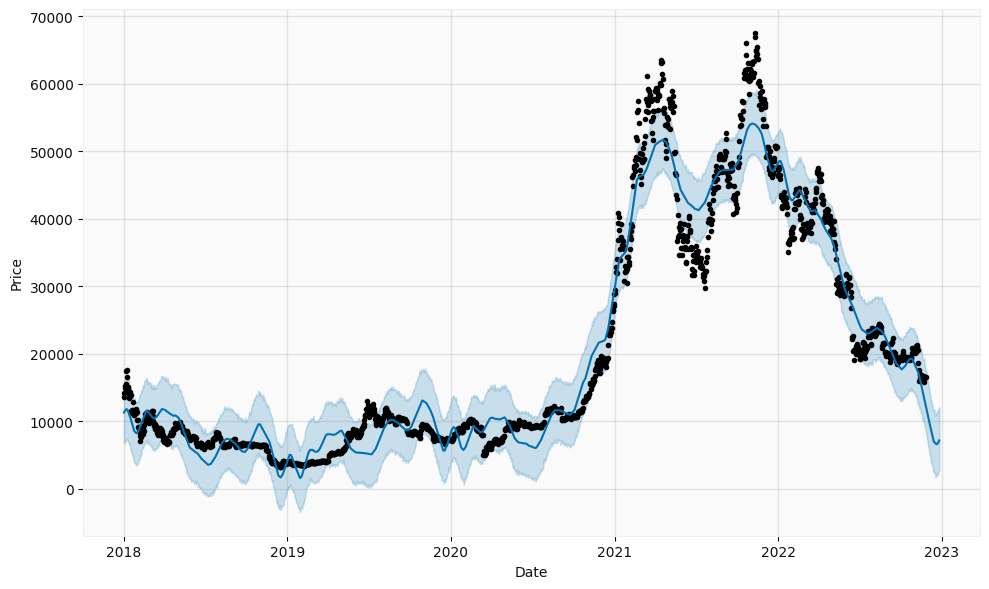

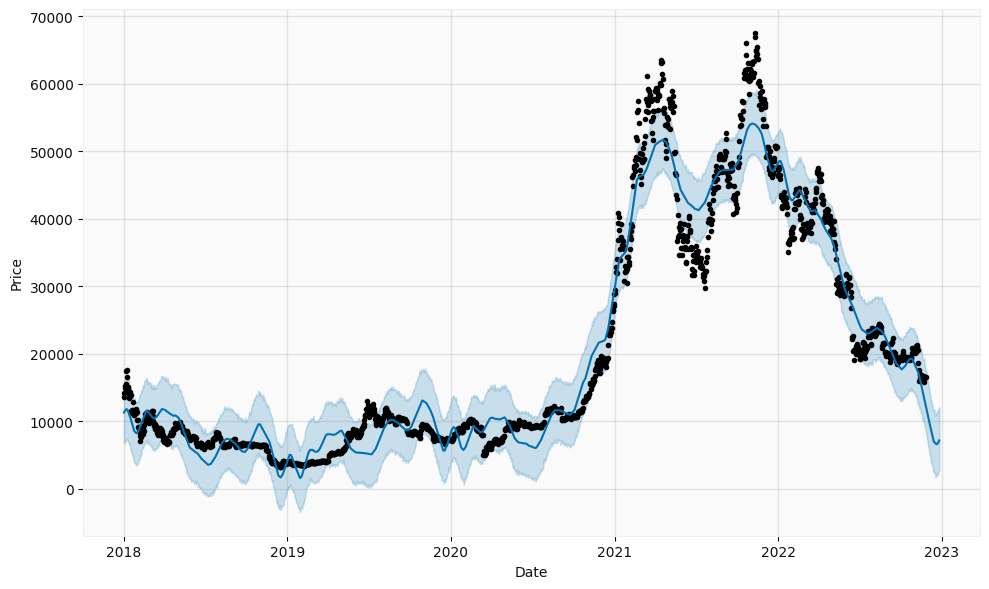

In [ ]:
m.plot(forecast, xlabel='Date', ylabel='Price')

You can also plot each components of your trend. So that you can see the seasonality.

## Let's visualize the trend of the components 

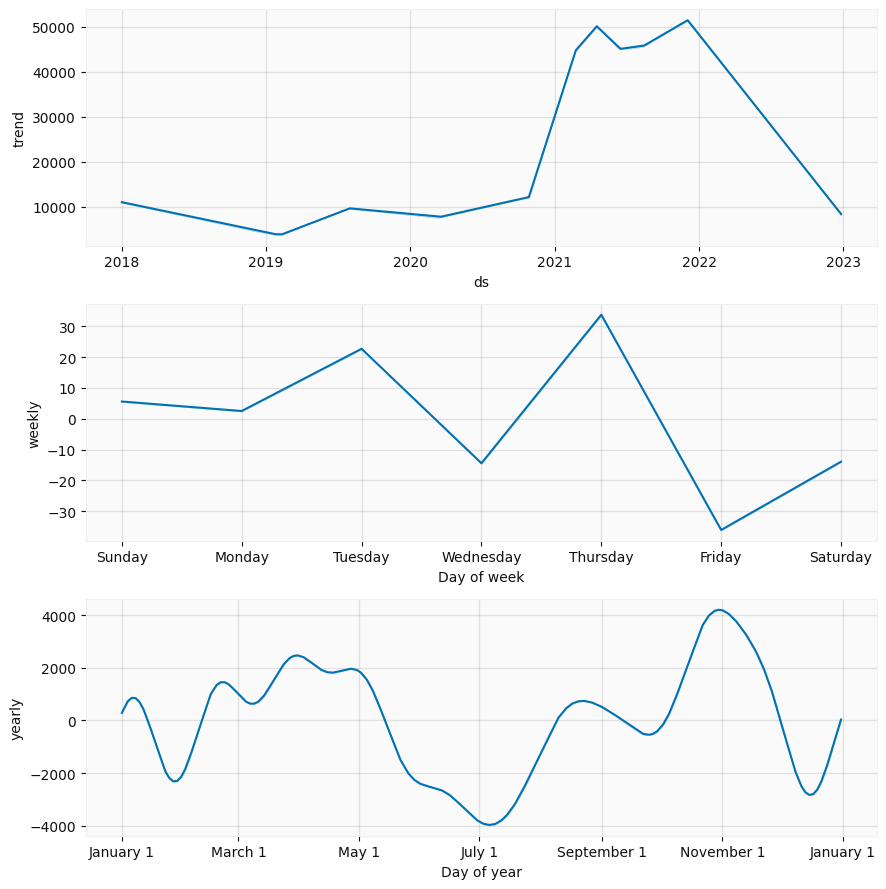

In [ ]:
fig2 = m.plot_components(forecast)

#Il existe des tendances annuelles et hebdomadaires : Le prix est plus élevé les 6 premiers mois de l'année et devient bas et constant les mois suivants. et en semaine, il est elevé le mercredi et jeudi


## Evaluate model

In [ ]:
df_merge_seas_true = pd.concat([p_df, forecast],axis=1,join="inner")
df_merge_seas_true=df_merge_seas_true[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge_seas_true.head()

,ds,ds,yhat_lower,yhat_upper,yhat,y
0,2018-01-01,2018-01-01,6839.066525,15741.254872,11266.690443,14112.200195
1,2018-01-02,2018-01-02,7153.997881,16074.761214,11450.988834,13625.000000
2,2018-01-03,2018-01-03,6641.991813,15877.520636,11550.350774,14978.200195
3,2018-01-04,2018-01-04,7134.496934,16100.409851,11704.274403,15270.700195
4,2018-01-05,2018-01-05,7129.751341,16343.690458,11706.996122,15477.200195


In [ ]:
# calculate MAE between observed and predicted values 
import sklearn.metrics as sklearn

y_true = df_merge_seas_true['y'].values
y_pred = df_merge_seas_true['yhat'].values
mae_00 = sklearn.mean_absolute_error(y_true, y_pred)
mape_00 = sklearn.mean_absolute_percentage_error(y_true, y_pred)

### MAE ET MAPE

In [ ]:
print("Sans effet de saisonnalité, la valeur de MAE est {} et de MAPE est {}.".format(mae_00,mape_00))

Sans effet de saisonnalité, la valeur de MAE est 2728.2730691066613 et de MAPE est 0.2013038299365322.


## Ajout de l'effet de saisonnalité


In [ ]:
m = Prophet(daily_seasonality =True)
m.fit(p_df)

### Periods

In [ ]:
future = m.make_future_dataframe(periods=30) # On essaie de prédire pour 30 prochains jours
forecast = m.predict(future)



Check now its impact on your forecast 

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
data

## Evaluate model

In [ ]:
df_merge_seas_true = pd.concat([p_df, forecast],axis=1,join="inner")
df_merge_seas_true=df_merge_seas_true[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge_seas_true.head()

In [ ]:
# calculate MAE between observed and predicted values 
import sklearn.metrics as sklearn

y_true = df_merge_seas_true['y'].values
y_pred = df_merge_seas_true['yhat'].values
mae_01 = sklearn.mean_absolute_error(y_true, y_pred)
mape_01 = sklearn.mean_absolute_percentage_error(y_true, y_pred)

### MAE et MAPE

In [ ]:
print("En prenant compte de l'effet de saisonnalité, la valeur de MAE est {} et de MAPE est {}.".format(mae_01,mape_01))

# Train Time Series Model Using Prophet

interval_width specifies the prediction interval. We changed the default value of 80% to 95% prediction interval. It makes the upper bound and the lower bound of the prediction broader.

n_changepoints is the number of change points in the time series trend. The default value is 25. Based on the shape of the Bitcoin price data, it was set at 40.

In [ ]:
# Train test split
p_df['Volume']=data['Volume']
df= p_df
df_train = df[df['ds']<= pd.to_datetime("2022-11-01").date()]
df_test = df[df['ds']>pd.to_datetime("2022-11-01").date()]

# Print the number of records and date range for training and testing dataset.
print('The training dataset has', len(df_train), 'records, ranging from', df_train['ds'].min(), 'to', df_train['ds'].max())
print('The testing dataset has', len(df_test), 'records, ranging from', df_test['ds'].min(), 'to', df_test['ds'].max())

The training dataset has 1766 records, ranging from 2018-01-01 to 2022-11-01
The testing dataset has 25 records, ranging from 2022-11-02 to 2022-11-26


# Without Changing changepoints

In [ ]:
# Create the prophet model with confidence internal of 95%
m = Prophet() #interval_width=0.95, 

# Fit the model using the training dataset

m.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Periods

In [ ]:
# Create a future dataframe for prediction
future = m.make_future_dataframe(periods=45)

# Forecast the future dataframe values
forecast = m.predict(future)

# Check the forecasted values and upper/lower bound
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1806,2022-12-12,4781.454975,799.266005,8839.330090
1807,2022-12-13,4579.802881,335.859763,8965.684966
1808,2022-12-14,4333.087042,350.792034,8818.915721
1809,2022-12-15,4229.070368,-18.128383,8321.869670
1810,2022-12-16,4017.398845,-421.910134,8475.313669


### Plot forecast without changepoints

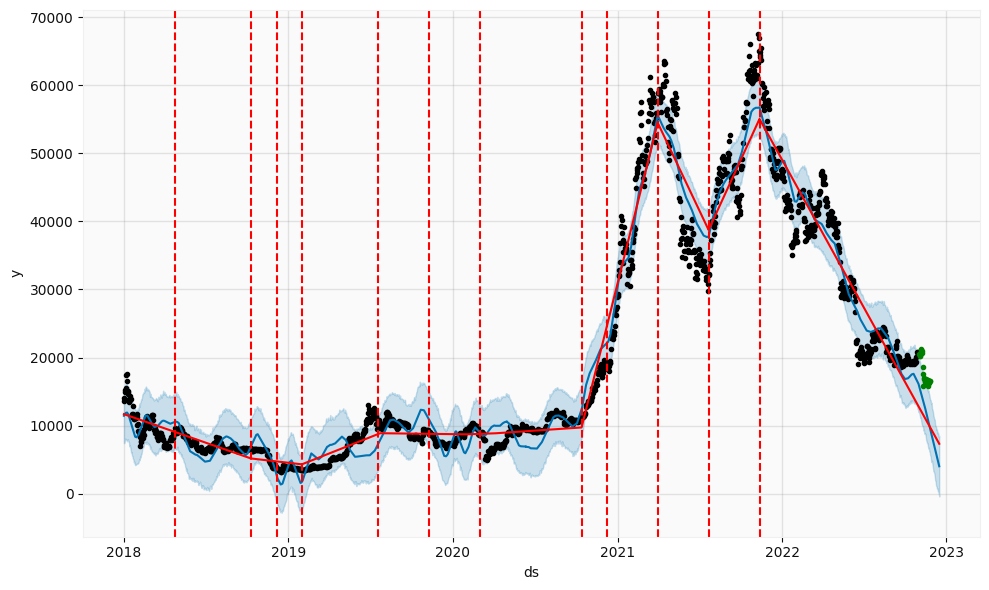

In [ ]:
# Visualize the forecast
fig = m.plot(forecast)
ax = fig.gca()
ax.plot( df_test["ds"], df_test["y"], 'g.')
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Evaluate Model

In [ ]:
df_merge_changepoints = pd.concat([p_df, forecast],axis=1,join="inner")
df_merge_changepoints=df_merge_changepoints[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge_changepoints.head()

# calculate MAE between observed and predicted values 
import sklearn.metrics as sklearn

y_true = df_merge_changepoints['y'].values
y_pred = df_merge_changepoints['yhat'].values
mae_02 = sklearn.mean_absolute_error(y_true, y_pred)
mape_02 = sklearn.mean_absolute_percentage_error(y_true, y_pred)

#### MAE ET MAPE

In [ ]:
print("En prenant compte de l'effet de saisonnalité, la valeur de MAE est {} et de MAPE est {}.".format(mae_02,mape_02))

## Changing changepoints

### Predictions using changepoint_prior_scale=0.1 as parameter



changepoint_prior_scale: This is probably the most impactful parameter. It determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints. As described in this documentation, if it is too small, the trend will be underfit and variance that should have been modeled with trend changes will instead end up being handled with the noise term. If it is too large, the trend will overfit and in the most extreme case you can end up with the trend capturing yearly seasonality. The default of 0.05 works for many time series,
but this could be tuned; a range of [0.001, 0.5] would likely be about right.

In [ ]:
# Create the prophet model with confidence internal of 95%
l = Prophet(changepoint_prior_scale=0.1) #interval_width=0.95, 

# Fit the model using the training dataset

l.fit(df_train)

### Periods

In [ ]:
# Create a future dataframe for prediction
future = l.make_future_dataframe(periods=45)

# Forecast the future dataframe values
forecast = l.predict(future)

# Check the forecasted values and upper/lower bound
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
forecast.to_csv("forcecast_45days.csv")

### Plot forecast with changepoints

In [ ]:
# Visualize the forecast
fig = m.plot(forecast)
ax = fig.gca()
ax.plot( df_test["ds"], df_test["y"], 'b.')
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Evaluate Model

In [ ]:
df_merge_changepoints = pd.concat([p_df, forecast],axis=1,join="inner")
df_merge_changepoints=df_merge_changepoints[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge_changepoints.head()

# calculate MAE between observed and predicted values 
import sklearn.metrics as sklearn

y_true = df_merge_changepoints['y'].values
y_pred = df_merge_changepoints['yhat'].values
mae_03 = sklearn.mean_absolute_error(y_true, y_pred)
mape_03 = sklearn.mean_absolute_percentage_error(y_true, y_pred)



In [ ]:
future

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1806,2022-12-12
1807,2022-12-13
1808,2022-12-14
1809,2022-12-15


#### MAE ET MAPE

In [ ]:
print("En prenant compte de l'effet de saisonnalité, la valeur de MAE est {} et de MAPE est {}.".format(mae_03,mape_03))

En prenant compte de l'effet de saisonnalité, la valeur de MAE est 2439.6213311062047 et de MAPE est 0.17656866358733087.


### Number of changepoints

In [ ]:
# On peut afficher les changepoints qui ont été utilisés pour le graphique ci dessus
print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{df.loc[df["ds"].isin(m.changepoints)]}')

There are 25 change points. 
The change points dates are 
              ds             y       Volume
169   2018-06-19   6742.390137   4057029888
339   2018-12-06   3754.074463   5878333109
959   2020-08-17  11895.658203  28227687027
1355  2021-09-17  47771.003906  28727713711


/usr/local/lib/python3.8/dist-packages/pandas/core/algorithms.py:524: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



### Plot the components

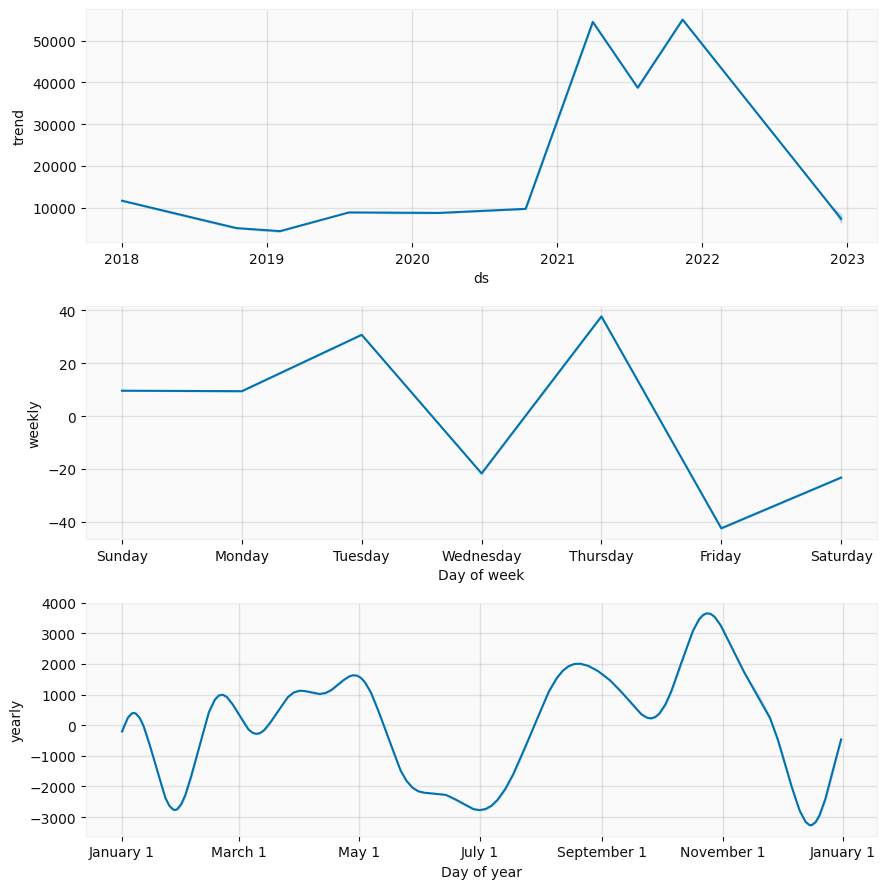

In [ ]:
# Visualize the components
m.plot_components(forecast);

### Cross Validation

Here we do cross-validation to assess prediction performance on a horizon of 45 days,starting with 1701 days of training data in the first cutoff and then making predictions every 3 days.


In [ ]:
#period = 3 et horizon = 45 ,initial 1701 , mape = 0.09

In [ ]:
# Cross validation
df_cv = cross_validation(m, initial='1200 days', period='15 days', horizon = '30 days', parallel="processes")

INFO:prophet:Making 36 forecasts with cutoffs between 2021-04-25 00:00:00 and 2022-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7efd0a75aa30>


In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-04-26,61831.660560,59572.765025,63768.832837,49077.792969,2021-04-25
1,2021-04-27,62166.240368,60222.015836,64293.712574,54030.304688,2021-04-25
2,2021-04-28,62485.120370,60365.407379,64496.869582,55036.636719,2021-04-25
3,2021-04-29,62847.689302,60682.866638,65014.401256,54858.089844,2021-04-25
4,2021-04-30,63138.729139,61074.731568,65308.584153,53568.664063,2021-04-25
...,...,...,...,...,...,...
1075,2022-10-28,16042.750710,12252.527355,19656.455634,20287.957031,2022-10-02
1076,2022-10-29,16032.817885,12222.597210,20123.459045,20595.103516,2022-10-02
1077,2022-10-30,16024.137876,12139.451288,19957.472651,20817.982422,2022-10-02
1078,2022-10-31,15953.069911,12079.265000,19976.156226,20633.695313,2022-10-02


In [ ]:
df_cv['cutoff'].value_counts()

2021-04-25    30
2021-05-10    30
2022-02-19    30
2022-03-06    30
2022-03-21    30
2022-04-05    30
2022-04-20    30
2022-05-05    30
2022-05-20    30
2022-06-04    30
2022-06-19    30
2022-07-04    30
2022-07-19    30
2022-08-03    30
2022-08-18    30
2022-09-02    30
2022-09-17    30
2022-02-04    30
2022-01-20    30
2022-01-05    30
2021-08-23    30
2021-05-25    30
2021-06-09    30
2021-06-24    30
2021-07-09    30
2021-07-24    30
2021-08-08    30
2021-09-07    30
2021-12-21    30
2021-09-22    30
2021-10-07    30
2021-10-22    30
2021-11-06    30
2021-11-21    30
2021-12-06    30
2022-10-02    30
Name: cutoff, dtype: int64

Step 9 evaluates the cross-validation model performance. 
* MSE (Mean Squared Error) sums up the squared difference between actual and prediction and is divided by the number of predictions.
* RMSE (Root Mean Square Error) takes the square root of MSE.
* MAE (Mean Absolute Error) sums up the absolute difference between actual and prediction and is divided by the number of predictions.
* MAPE (Mean Absolute Percentage Error) sums up the absolute percentage difference between actual and prediction and is divided by the number of predictions. MAPE is independent of the magnitude of data, so it can be used to compare different forecasts. But it's undefined when the actual value is zero.
* MDAPE (Median Absolute Percentage Error) is similar to MAPE. The difference is that it calculates the median instead of taking the average of the absolute percentage difference.
* SMAPE (Symmetric Mean Absolute Percentage Error) is similar to MAPE. The difference is that when calculating absolute percentage error, the denominator is the actual value for MAPE and the average of the actual and predicted value for SMAPE.



On each day, we can see three dots. This is because there are three models in the cross-validation, and each dot represents the MAPE from one model.

The line is the aggregated performance across all the models. We can see that MAPE value increases with days, which is expected because time series tend to make better predictions for the near future than the far future.

In [ ]:
# Model performance metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,8.821044e+07,9392.041097,7433.537074,0.212721,0.162052,0.185643,0.462963
1,4 days,9.589436e+07,9792.566632,7686.818730,0.219671,0.171310,0.190988,0.472222
2,5 days,1.019460e+08,10096.833660,7981.997416,0.225902,0.173163,0.196415,0.481481
3,6 days,1.028100e+08,10139.524232,7976.272602,0.226025,0.173163,0.196205,0.481481
4,7 days,1.040867e+08,10202.290154,8096.423063,0.230136,0.173623,0.199727,0.435185
5,8 days,1.096754e+08,10472.601514,8296.468850,0.236498,0.176960,0.204175,0.398148
6,9 days,1.193406e+08,10924.312807,8733.423592,0.248608,0.185497,0.213558,0.379630
7,10 days,1.300508e+08,11403.980264,9060.254281,0.258720,0.192904,0.220226,0.388889
8,11 days,1.341552e+08,11582.538786,9132.029898,0.262263,0.191012,0.222105,0.416667
9,12 days,1.406591e+08,11859.977136,9218.836269,0.267263,0.187818,0.224331,0.425926


/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



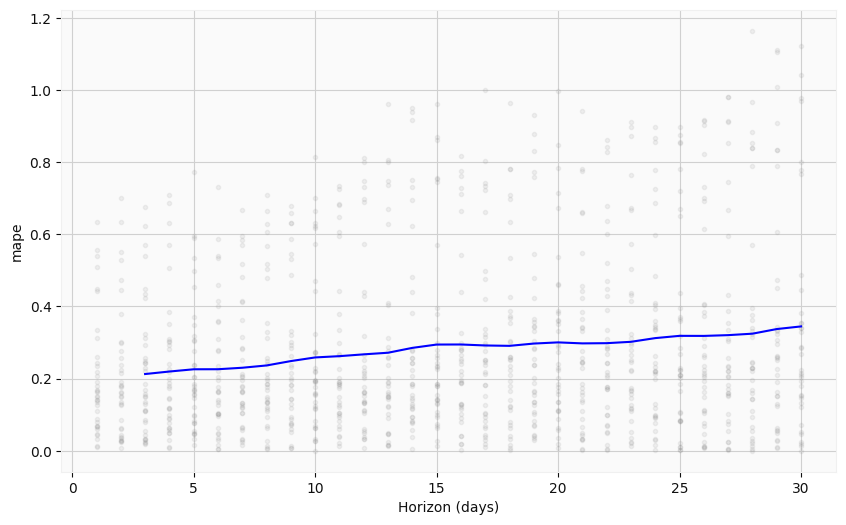

In [ ]:
# Visualize the performance metrics
fig = plot_cross_validation_metric(df_cv, metric='mape')